In [6]:
#!pip install natsort

In [5]:
import cv2 
import pytesseract

In [6]:
%matplotlib inline
from os.path import join,exists, basename, dirname, splitext
from glob import glob
from natsort import natsorted
import cv2
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd

In [7]:
import os
fn = "f1.5-VIDEO_2018-03-1609.33.31__ProjectPetrobras-SP12__Dive702_C1"
ext= ".png"
csv_name = fn+".csv" # MUDAR AQUI
# csv_name = "f1.3-.csv" # MUDAR AQUI
img_name = fn + ext
# img_name = "f1.3-.png"
PATH_FOLDER_CSVS = r"\\ica-094\share\nilton\formatos" # MUDAR AQUI
# PATH_FOLDER_CSVS = r"\\ica-095\tables\manntis\formatos" # MUDAR AQUI

path_csv = os.path.join(PATH_FOLDER_CSVS , csv_name)
print(path_csv)

\\ica-094\share\nilton\formatos\f1.5-VIDEO_2018-03-1609.33.31__ProjectPetrobras-SP12__Dive702_C1.csv


In [8]:
%matplotlib inline
def cut_images(path, xmin, ymin, xmax, ymax, label):
    im = cv2.imread(path)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    
    im_crop = im[ymin:ymin+np.abs(ymax - ymin), xmin:xmin+np.abs(xmax - xmin)]
    return im_crop
    #fig = plt.figure(figsize=(5, 3))
    #fig.suptitle("{} {} {} {} {} :".format(xmin, ymin, xmax, ymax, label), fontsize=20)
    #plt.imshow(im_crop)

In [9]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [10]:
%matplotlib inline
def plot_images(path, xmin, ymin, xmax, ymax, label):
    im = cv2.imread(path)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    
    im_crop = im[ymin:ymin+np.abs(ymax - ymin), xmin:xmin+np.abs(xmax - xmin)]
    fig = plt.figure(figsize=(5, 3))
    fig.suptitle("{} {} {} {} {} :".format(xmin, ymin, xmax, ymax, label), fontsize=20)
    plt.imshow(im_crop)

In [11]:
PATH_FOLDER_CSVS+"\\" +fn+ext

'\\\\ica-094\\share\\nilton\\formatos\\f1.5-VIDEO_2018-03-1609.33.31__ProjectPetrobras-SP12__Dive702_C1.png'

In [12]:

df = pd.read_csv(path_csv)
for index, row in df.iterrows():
   # path_img = join(PATH_FOLDER_CSVS,img_name)
    img = cut_images(PATH_FOLDER_CSVS+"\\" +fn+ext, row['xmin'], row['ymin'], row['xmax'], row['ymax'], row['label'])
    
#     img = cut_images(r'\\ica-094\share\nilton\formatos\f1.3-.png', row['xmin'], row['ymin'], row['xmax'], row['ymax'], row['label'])
    # Adding custom options
    custom_config = r'--oem 3 --psm 6'
    print(pytesseract.image_to_string(img, config=custom_config))
    #break

757347695
ie
Sy Real
E:
oh
O06000484908
- LEVANTAMENTO GEODESICO VISUAL DO 7-RO-16D-RJS
tei
HDG:
ROAeUe
fe
1805.29
Pe B
sthcye

ri]
abe Nal ata t abd
Rory intel ae ea
Dive 702
09:35:12
16/03/2018
subsea
See Rela


In [13]:
print(type(pytesseract.image_to_string(img, config=custom_config)))

<class 'str'>


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


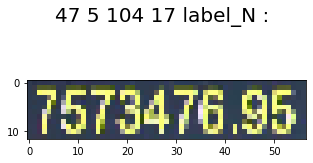

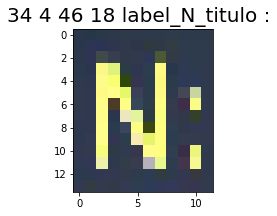

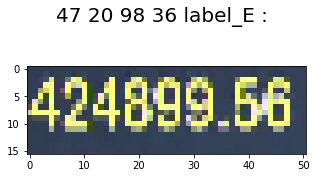

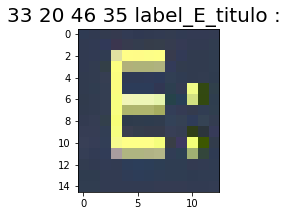

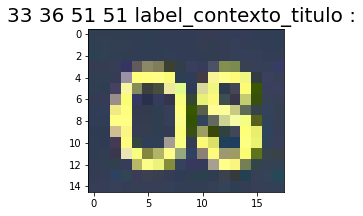

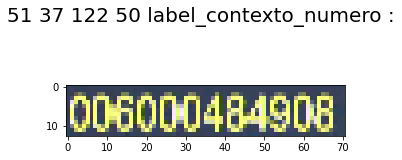

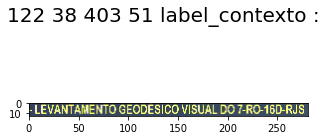

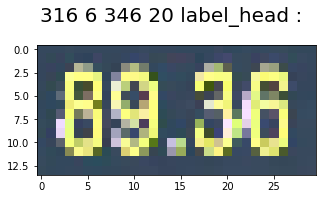

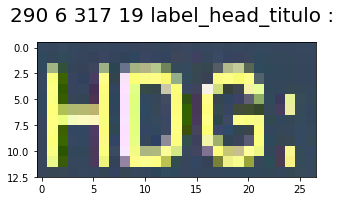

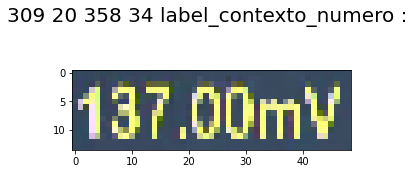

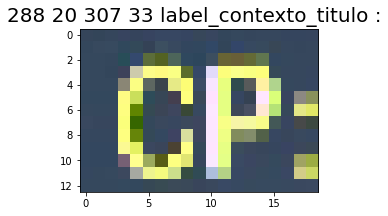

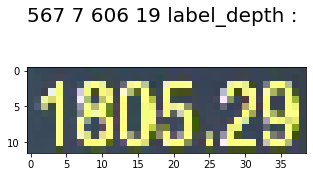

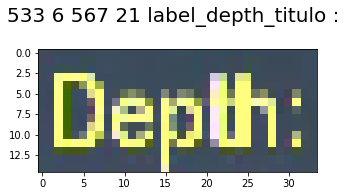

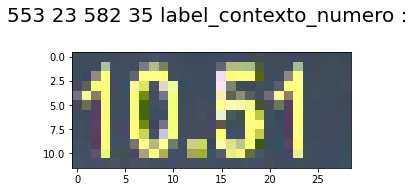

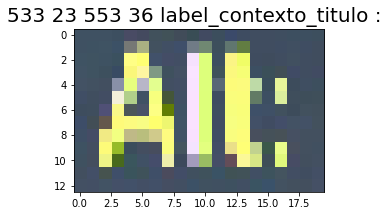

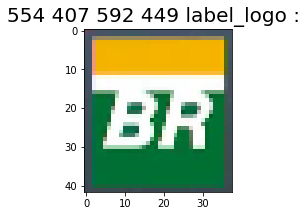

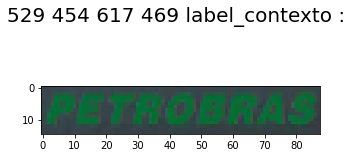

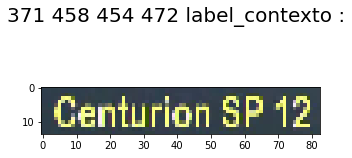

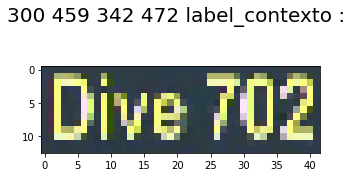

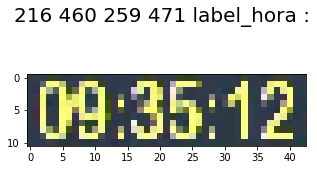

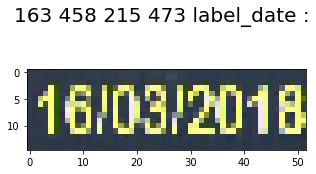

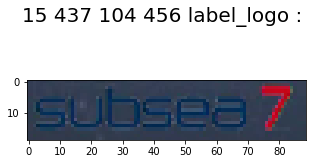

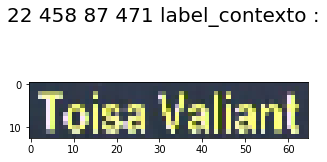

In [14]:

df = pd.read_csv(path_csv)
for index, row in df.iterrows():
    path_img = join(PATH_FOLDER_CSVS,img_name)
    plot_images(path_img, row['xmin'], row['ymin'], row['xmax'], row['ymax'], row['label'])
    img = cut_images(PATH_FOLDER_CSVS+"\\" +fn+ext, row['xmin'], row['ymin'], row['xmax'], row['ymax'], row['label'])
#     img = cut_images(r'\\ica-094\share\nilton\formatos\f1.3-.png', row['xmin'], row['ymin'], row['xmax'], row['ymax'], row['label'])
    # Adding custom options
    custom_config = r'--oem 3 --psm 6'
   # print(pytesseract.image_to_string(img, config=custom_config))
    df.loc[index,('text')]=pytesseract.image_to_string(img, config=custom_config)
    #break

In [16]:
df.to_csv(f"{PATH_FOLDER_CSVS}\\csv_novo\\{fn}.csv",index=False, header=True)
# df.to_csv(PATH_FOLDER_CSVS+"\\csv_novo\\"+fn+".csv",index=False, header=True)

# df.to_csv(r'\\ica-094\share\nilton\formatos\csv_novo\f1.3-copy.csv',index=False, header=True)


In [17]:
df.head()

,center_x,center_y,width,height,xmin,ymin,xmax,ymax,label,text,font,filename
0,NaN,NaN,NaN,NaN,47,5,104,17,label_N,757347695,den,f1.5-VIDEO_2018-03-1609.33.31__ProjectPetrobra...
1,NaN,NaN,NaN,NaN,34,4,46,18,label_N_titulo,ie,den,f1.5-VIDEO_2018-03-1609.33.31__ProjectPetrobra...
2,NaN,NaN,NaN,NaN,47,20,98,36,label_E,Sy Real,den,f1.5-VIDEO_2018-03-1609.33.31__ProjectPetrobra...
3,NaN,NaN,NaN,NaN,33,20,46,35,label_E_titulo,E:,den,f1.5-VIDEO_2018-03-1609.33.31__ProjectPetrobra...
4,NaN,NaN,NaN,NaN,33,36,51,51,label_contexto_titulo,oh,den,f1.5-VIDEO_2018-03-1609.33.31__ProjectPetrobra...


In [19]:
path_img

'\\\\ica-094\\share\\nilton\\formatos\\f1.5-VIDEO_2018-03-1609.33.31__ProjectPetrobras-SP12__Dive702_C1.png'

In [18]:
# img = cut_images(r'\\ica-095\tables\manntis\formatos\f1.2-.jpg', 139, 41, 281, 71, 'label_E')
# # img = cv2.imread('image.jpg')

# # Adding custom options
# custom_config = r'--oem 3 --psm 6'
# pytesseract.image_to_string(img, config=custom_config)